# Sales prediction using python 
- Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and advertising platform selection.
- In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs.
- By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.


In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load dataset
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


There are four columns namely TV, Radio, Newspaper and Sales in which Sales is the predicatable one among these, hence Sales is output, We need to create an machine learning model using linear regression to predict the sales.

In [3]:
df.shape

(200, 4)

In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Since the data is clean and doesnot have any NULL values and errors, we can preprocess the data

## Data cleaning

In [6]:
# checking null values
df.isnull().sum()*100/df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

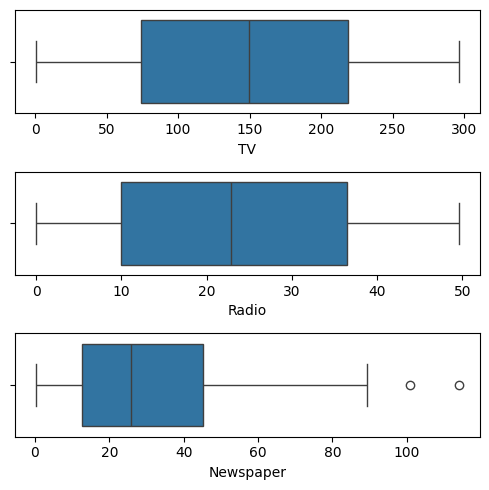

In [7]:
# checking outliers

fig, axs = plt.subplots(3, figsize=(5, 5))  #  3 columns

# Plotting the box plots
sns.boxplot(data=df, x='TV', ax=axs[0])

sns.boxplot(data=df, x='Radio', ax=axs[1])

sns.boxplot(data=df, x='Newspaper', ax=axs[2])

# Adjust the layout to make sure titles and labels fit well
plt.tight_layout()
plt.show()

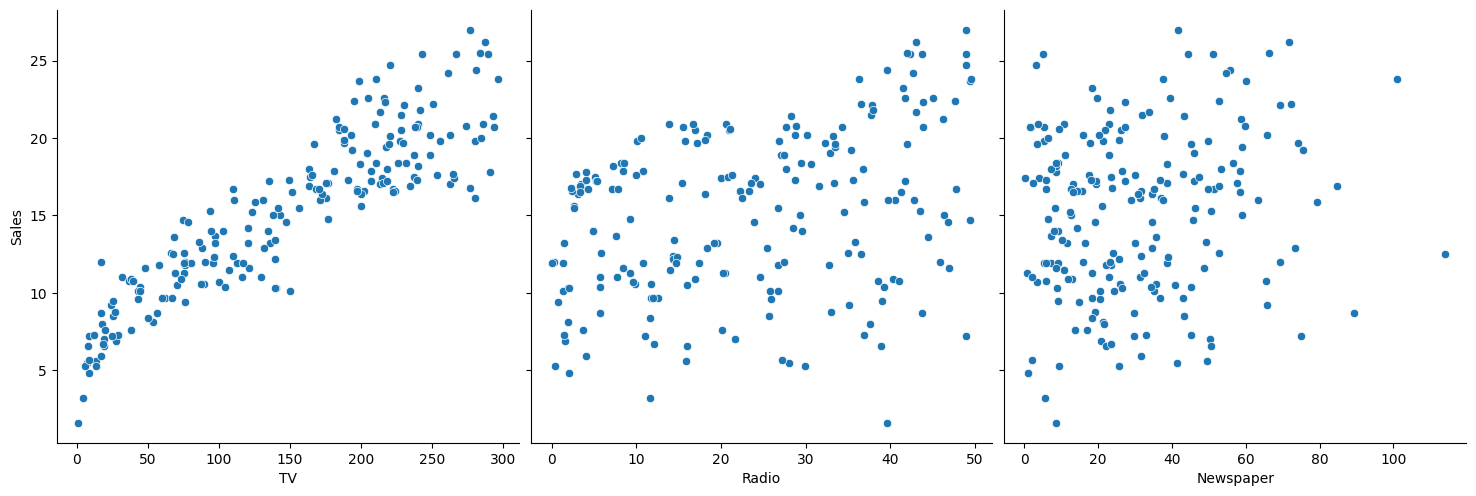

In [8]:
# Hence there are no outliers present in the data, we can visualize the relationships between the data

sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars= 'Sales', height=5, aspect= 1, kind='scatter')
plt.show()

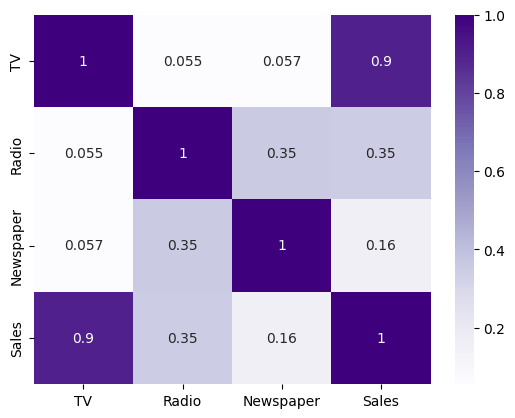

In [9]:
# checking correleation between variables
sns.heatmap(df.corr(), annot=True,cmap='Purples')
plt.show()


# Model Building

In [10]:
# split the data into training and test set

X = df.drop(['Sales'], axis=1)
y = df['Sales']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 1)

In [11]:
X_train.head()

,TV,Radio,Newspaper
108,13.1,0.4,25.6
107,90.4,0.3,23.2
189,18.7,12.1,23.4
14,204.1,32.9,46.0
56,7.3,28.1,41.4


In [12]:
y_train.head()

108     5.3
107    12.0
189     6.7
14     19.0
56      5.5
Name: Sales, dtype: float64

In [13]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = lr_model.predict(X_test)

In [15]:
lr_model.score(X_test,y_test)

0.8747226291661847

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.409333612892369
R-squared: 0.8747226291661847


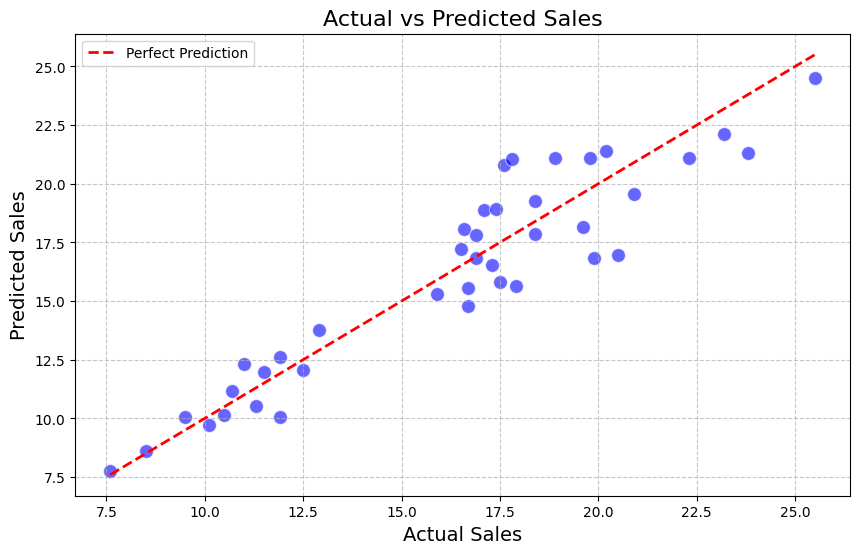

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, s=100, color='blue', alpha=0.6, edgecolor='w', marker='o')

# Adding a line for perfect prediction
line_start = min(y_test.min(), y_pred.min())
line_end = max(y_test.max(), y_pred.max())
plt.plot([line_start, line_end], [line_start, line_end], color='red', linestyle='--', lw=2, label='Perfect Prediction')

# Titles and labels
plt.title("Actual vs Predicted Sales", fontsize=16)
plt.xlabel("Actual Sales", fontsize=14)
plt.ylabel("Predicted Sales", fontsize=14)

# Adding a grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()


### While the model shows a reasonable fit, the presence of spread around the perfect prediction line indicates there are still errors around the perfect prediction line indicates there are still errors that could be reduced with further tuning or by using a more complex model.

- There appears to be a positive correlation between actual and predicted sales.
- The model is performing reasonably well but dispersion shows prediction errors.
- There is no significant bias since the points seems to be fairly distributed around the line.


In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the polynomial features into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)

# Make predictions
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f'Polynomial Regression Mean Squared Error: {mse_poly}')
print(f'Polynomial Regression R-squared: {r2_poly}')


Polynomial Regression Mean Squared Error: 1.442542636901541
Polynomial Regression R-squared: 0.9533174341074738


In [19]:
from sklearn.tree import DecisionTreeRegressor

# Train the decision tree model
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = model_tree.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree Regression Mean Squared Error: {mse_tree}')
print(f'Decision Tree Regression R-squared: {r2_tree}')


Decision Tree Regression Mean Squared Error: 1.7727499999999996
Decision Tree Regression R-squared: 0.9078228693787923


In [20]:
from sklearn.ensemble import RandomForestRegressor

# Train the random forest model
model_forest = RandomForestRegressor(random_state=42)
model_forest.fit(X_train, y_train)

# Make predictions
y_pred_forest = model_forest.predict(X_test)

# Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f'Random Forest Regression Mean Squared Error: {mse_forest}')
print(f'Random Forest Regression R-squared: {r2_forest}')


Random Forest Regression Mean Squared Error: 0.9821755750000019
Random Forest Regression R-squared: 0.9489301219744831


In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the gradient boosting model
model_gbr = GradientBoostingRegressor(random_state=42)
model_gbr.fit(X_train, y_train)

# Make predictions
y_pred_gbr = model_gbr.predict(X_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting Regression Mean Squared Error: {mse_gbr}')
print(f'Gradient Boosting Regression R-squared: {r2_gbr}')


Gradient Boosting Regression Mean Squared Error: 1.305551154119772
Gradient Boosting Regression R-squared: 0.9321156625209608


In [22]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized features into training and testing sets
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the SVR model
model_svr = SVR(kernel='rbf')
model_svr.fit(X_train_svr, y_train_svr)

# Make predictions
y_pred_svr = model_svr.predict(X_test_svr)

# Evaluate the model
mse_svr = mean_squared_error(y_test_svr, y_pred_svr)
r2_svr = r2_score(y_test_svr, y_pred_svr)

print(f'Support Vector Regression Mean Squared Error: {mse_svr}')
print(f'Support Vector Regression R-squared: {r2_svr}')


Support Vector Regression Mean Squared Error: 4.30344658023381
Support Vector Regression R-squared: 0.8607348417941817


In [23]:
print(f'Linear Regression Mean Squared Error: {mse}')
print(f'Linear Regression R-squared: {r2}')

print(f'Polynomial Regression Mean Squared Error: {mse_poly}')
print(f'Polynomial Regression R-squared: {r2_poly}')

print(f'Decision Tree Regression Mean Squared Error: {mse_tree}')
print(f'Decision Tree Regression R-squared: {r2_tree}')

print(f'Random Forest Regression Mean Squared Error: {mse_forest}')
print(f'Random Forest Regression R-squared: {r2_forest}')

print(f'Gradient Boosting Regression Mean Squared Error: {mse_gbr}')
print(f'Gradient Boosting Regression R-squared: {r2_gbr}')

print(f'Support Vector Regression Mean Squared Error: {mse_svr}')
print(f'Support Vector Regression R-squared: {r2_svr}')


Linear Regression Mean Squared Error: 2.409333612892369
Linear Regression R-squared: 0.8747226291661847
Polynomial Regression Mean Squared Error: 1.442542636901541
Polynomial Regression R-squared: 0.9533174341074738
Decision Tree Regression Mean Squared Error: 1.7727499999999996
Decision Tree Regression R-squared: 0.9078228693787923
Random Forest Regression Mean Squared Error: 0.9821755750000019
Random Forest Regression R-squared: 0.9489301219744831
Gradient Boosting Regression Mean Squared Error: 1.305551154119772
Gradient Boosting Regression R-squared: 0.9321156625209608
Support Vector Regression Mean Squared Error: 4.30344658023381
Support Vector Regression R-squared: 0.8607348417941817


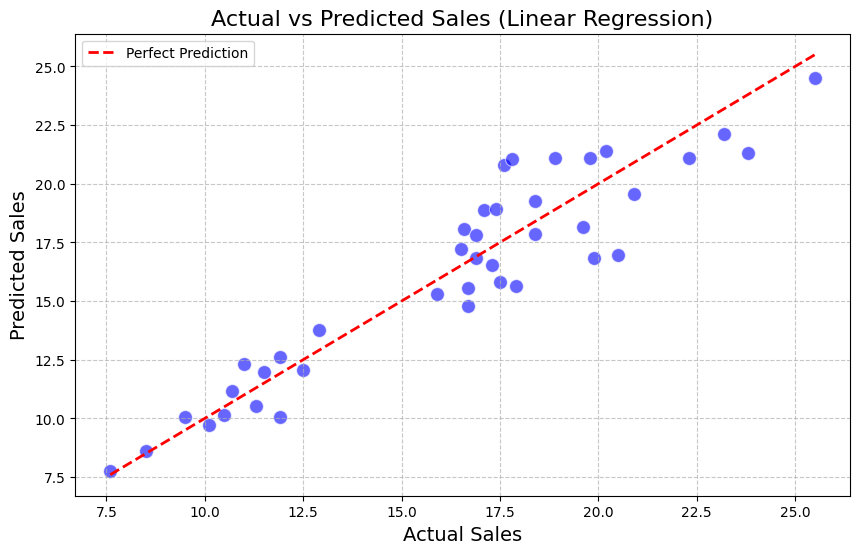

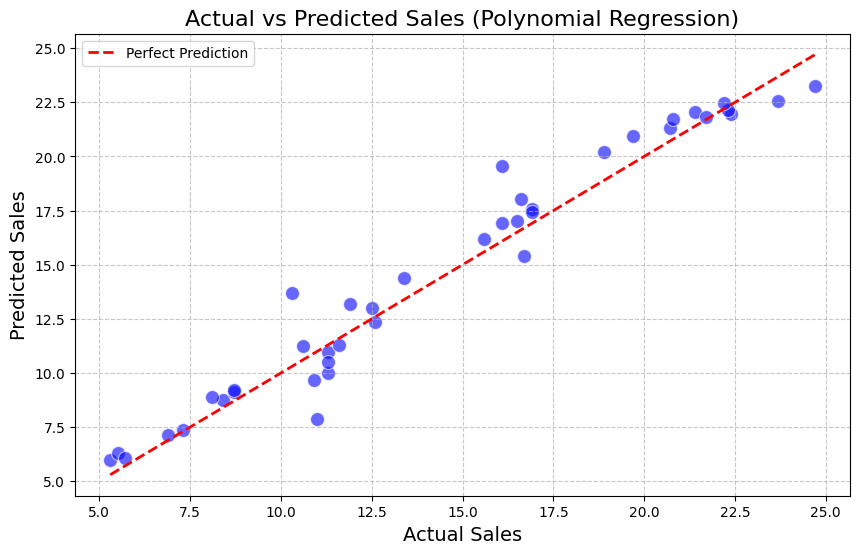

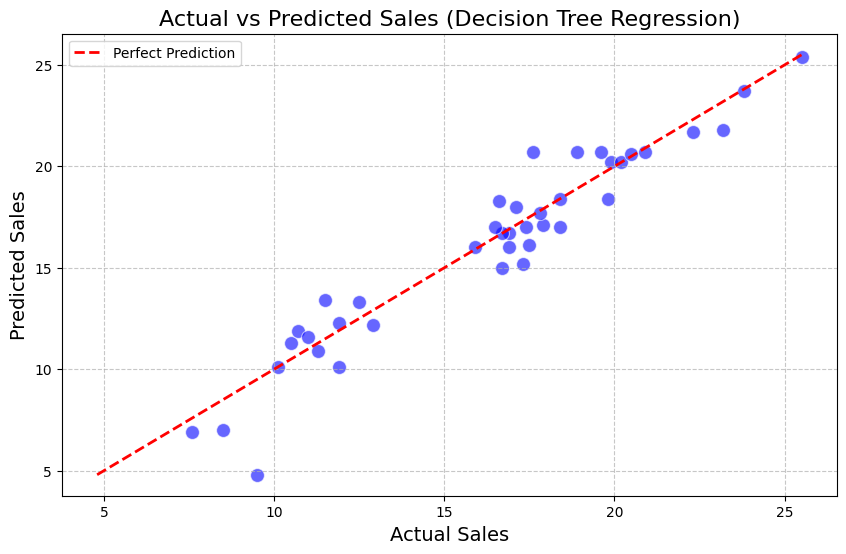

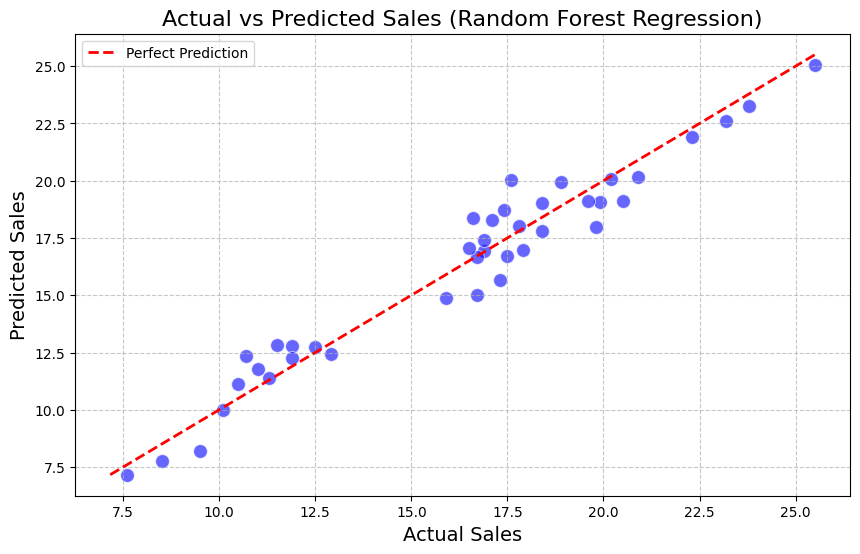

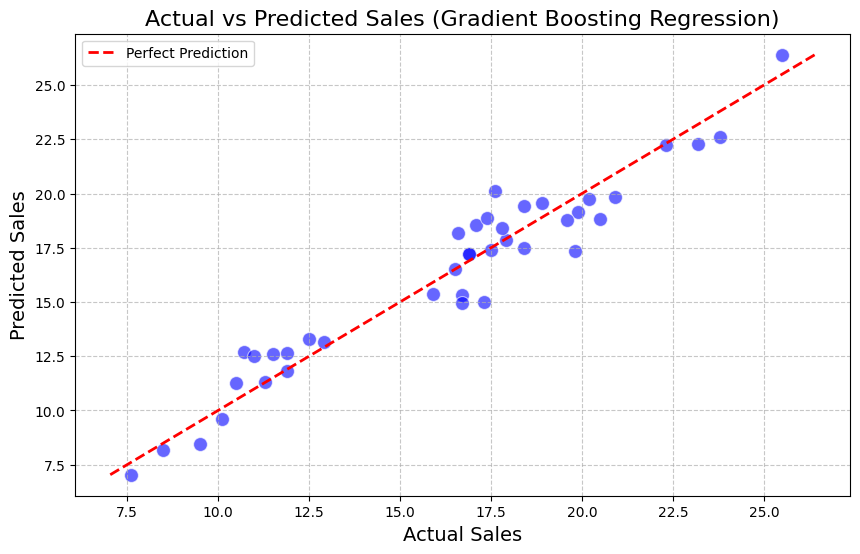

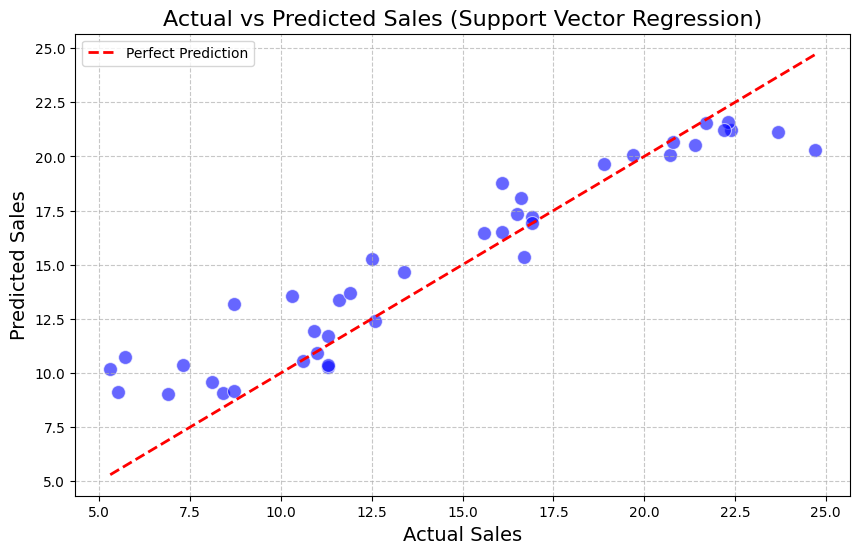

In [24]:
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, s=100, color='blue', alpha=0.6, edgecolor='w', marker='o')

    line_start = min(y_test.min(), y_pred.min())
    line_end = max(y_test.max(), y_pred.max())
    plt.plot([line_start, line_end], [line_start, line_end], color='red', linestyle='--', lw=2, label='Perfect Prediction')

    plt.title(f"Actual vs Predicted Sales ({model_name})", fontsize=16)
    plt.xlabel("Actual Sales", fontsize=14)
    plt.ylabel("Predicted Sales", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

plot_predictions(y_test, y_pred, 'Linear Regression')
plot_predictions(y_test_poly, y_pred_poly, 'Polynomial Regression')
plot_predictions(y_test, y_pred_tree, 'Decision Tree Regression')
plot_predictions(y_test, y_pred_forest, 'Random Forest Regression')
plot_predictions(y_test, y_pred_gbr, 'Gradient Boosting Regression')
plot_predictions(y_test_svr, y_pred_svr, 'Support Vector Regression')


From trying various models and visualization, we can conclude that polynomial regression is the best fit model since there is no presence of spread around the perfect prediction line indicates there are preferably less errors around the perfect prediction line compared to other model.